In [50]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE = "cpu"  # Forcing CPU usage
print(f"Using device: {DEVICE}")


Using device: cpu


In [ ]:
tokenizer = CLIPTokenizer("../dataa/vocab.json", merges_file="../dataa/merges.txt")
model_file = "../dataa/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

In [52]:

# text to image
prompt = "love you"
do_cfg = True
cfg_scale=20

#image to image

image_path = "../image/A-Cat.jpg"
input_image = Image.open(image_path)

strength = 1 # between 0 and 1

sampler = "ddpm"
num_inference_steps = 60
seed = 42

output_image = pipeline.generate(
    prompt = prompt,
    uncon_prompt = "should not be cartoon, painting, drawing, lowres",
    strength = strength,
    do_cfg = do_cfg,
    cfg_scale = cfg_scale,
    sampler_name= sampler,
    n_inference_steps = num_inference_steps,
    seed = seed,
    device = DEVICE,
    idle_device="cpu",
    model = models,
    tokenizer = tokenizer,
    video = True,
    input_image = None,


)


100%|██████████| 60/60 [03:06<00:00,  3.10s/it]


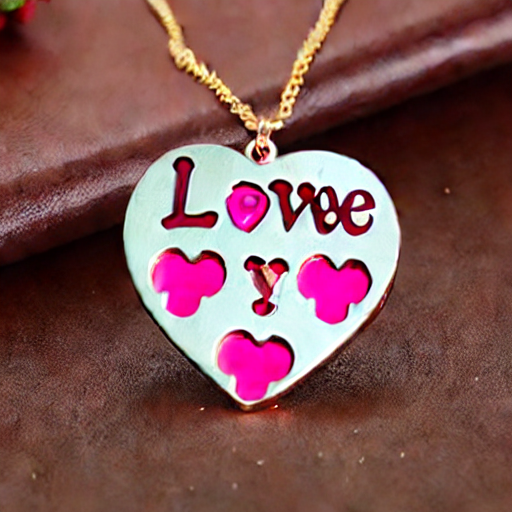

In [48]:
Image.fromarray(output_image[56])

In [31]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display
import io
import base64


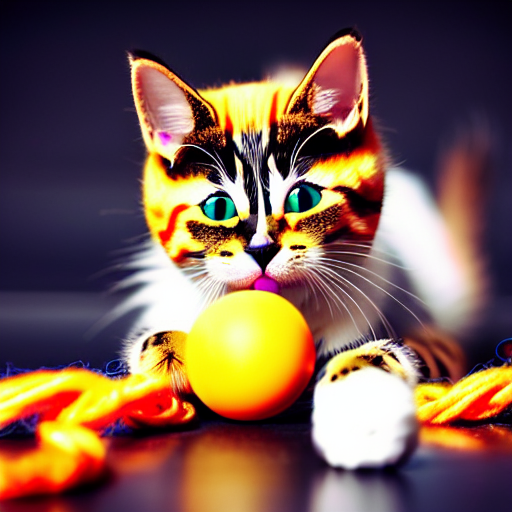

: 

In [ ]:
Image.fromarray(output_image)
# b = Image.fromarray(output_image)

In [49]:
def save_images_as_mp4(images, output_path='output.mp4', fps=60):
    """
    Save images as MP4 video using imageio.
    Requires: pip install imageio imageio-ffmpeg
    
    Args:
        images: List of PIL Images or numpy arrays
        output_path: Path to save the MP4
        fps: Frames per second
    """
    try:
        import imageio
    except ImportError:
        print("Please install imageio: pip install imageio imageio-ffmpeg")
        return
    
    # Convert to numpy arrays if needed
    frames = []
    for img in images:
        if isinstance(img, Image.Image):
            frames.append(np.array(img))
        else:
            frames.append(img)
    
    # Write video
    imageio.mimsave(output_path, frames, fps=fps)
    print(f"Video saved to {output_path}")

a = save_images_as_mp4(output_image, 'love.mp4', fps=10)


Video saved to love.mp4
